In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Tips

+ 控制绘图大小
  + `plotly.express`里，可以直接控制绘制的图形大小.
  ```python
  fig = px.scatter(df, x="total_bill", y="tip", facet_col="sex", width=800, height=400)
  ```
  + 使用`plotly.graph_object`时，必须要通过 update_layout 实现
  ```python
    fig.update_layout(
        autosize=False,
        width=500,
        height=500,
        # 设置一下 页面白边
        margin=dict(l=30, r=30, t=30, b=30)
    )
  ```
  

+ 使用`color`来进行分组时，比如`fig = px.scatter(data_frame=X_y, x='x1', y='x2',color='group', color_discrete_sequence=["red", "magenta", "blue"])`，根据其中用于分组的`group`字段类型，返回的结果是不一样的：
  + 如果`group`字段是一个连续字段，那么返回的`fig`里，就只有 1 条 trace
  + 如果`group`字段是一个离散字段(str之类的)，那么返回的`fig`里，就会有多条 trace，数量等于`group`的分组数。
  

+ 绘制多个子图时，可以采用如下的步骤，更为方便：
  1. `fig = make_subplots(rows, cols)` 构建包含多子图的 Figure 对象
  2. 使用 `subfig = px.xxx` 绘制对应的图形
  3. 根据 `px` 返回的 `subfig` 里的 **trace 个数**——这个要特别注意，调用 `fig.add_trace()` 或者 `fig.add_traces()` 方法将 px 得到的 trace 添加到对应位置的子图上。
  

+ [手动设置散点图或者线图的颜色](https://stackoverflow.com/questions/63413928/plotly-how-to-manually-set-the-color-of-points-in-plotly-express-scatter-plots)

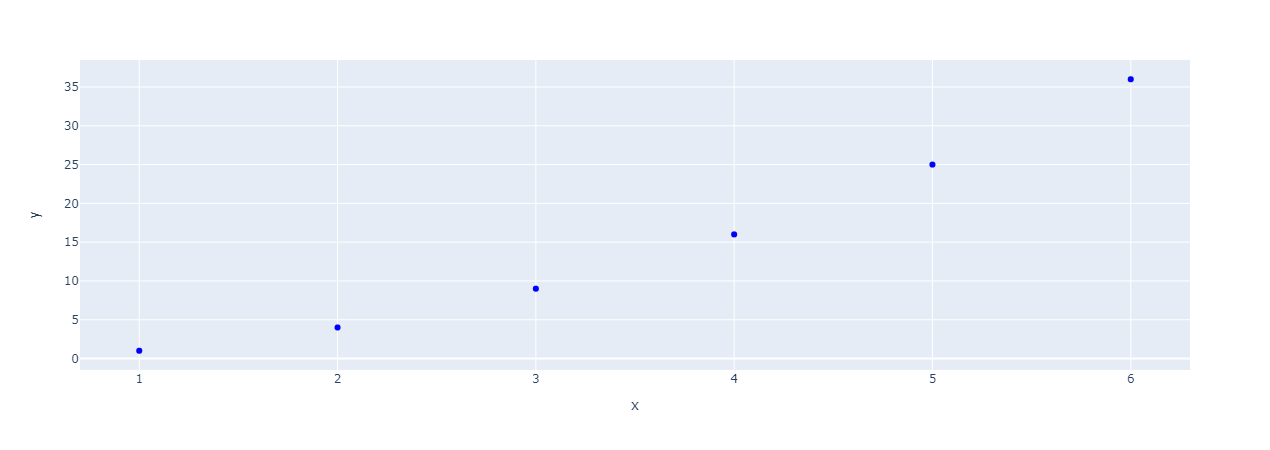

In [66]:
# 通过 color_discrete_sequence=['color'] 方式设置
scatter = px.scatter(x=[1,2,3,4,5,6], y=[1,4,9,16,25,36], color_discrete_sequence=['blue'])
scatter.show()

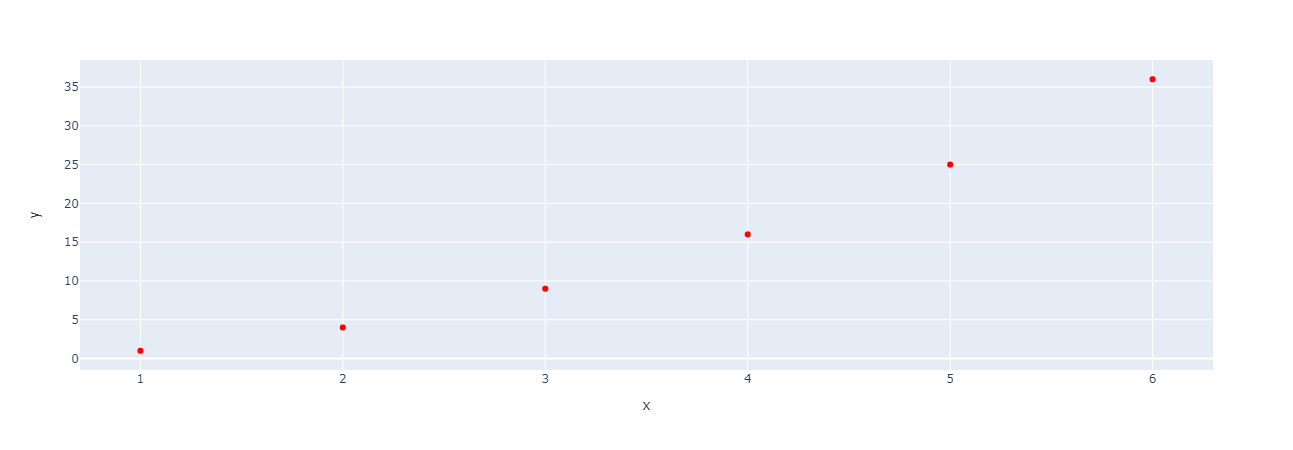

In [68]:
# 通过 update_traces 函数更新
scatter.update_traces(marker=dict(color='red'))
scatter.show()

+ `plotly.express`方式绘制多种图像在同一个图里

In [72]:
line = px.line(x=[1,2,3,4,5,6], y=[1,4,9,16,25,36])
scatter = px.scatter(x=[1,2,3,4,5,6], y=[1,4,9,16,25,36], color_discrete_sequence=['red'])

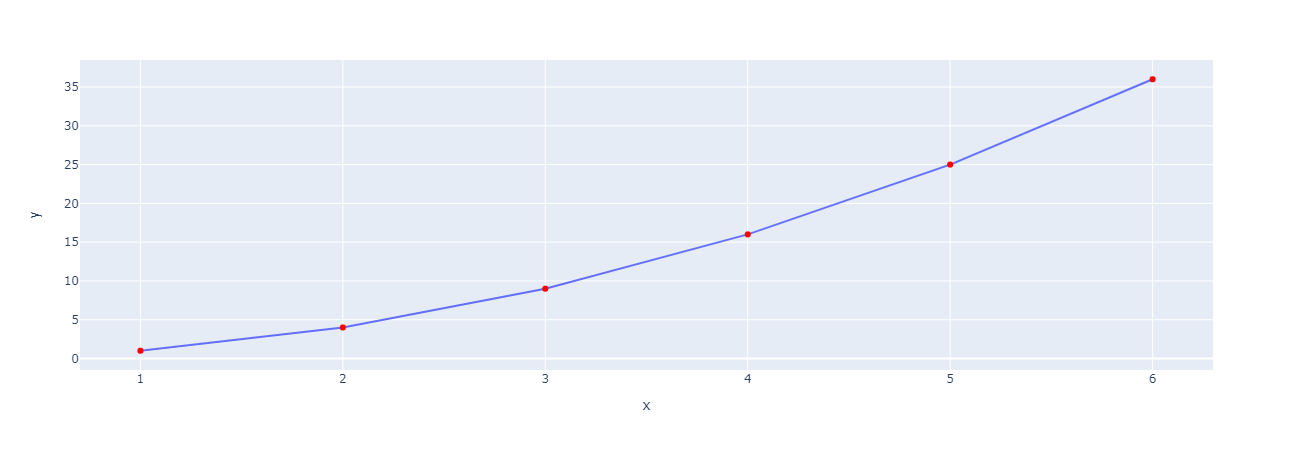

In [75]:
line.add_trace(scatter.data[0])
line

+ 绘制横纵坐标的指示线  
这个涉及到[Shapes的概念](https://plotly.com/python/shapes/)

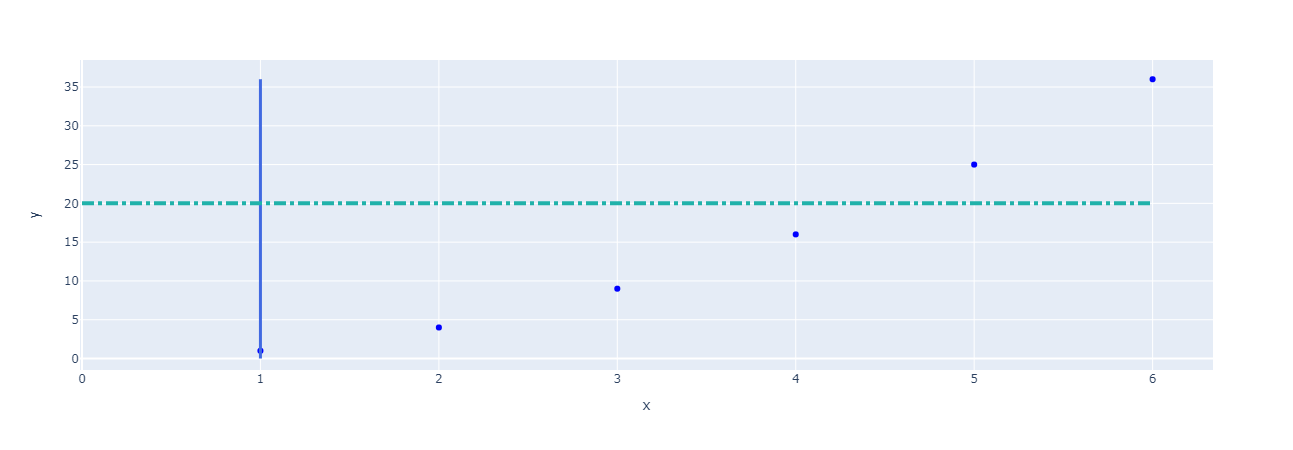

In [5]:
scatter = px.scatter(x=[1,2,3,4,5,6], y=[1,4,9,16,25,36], color_discrete_sequence=['blue'])

scatter.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=1,y0=0,
            x1=1,y1=36,
            line=dict(
                color="RoyalBlue",
                width=3
            )
))

scatter.add_shape(
        # Line Horizontal
            type="line",
            x0=0,y0=20,
            x1=6,y1=20,
            line=dict(
                color="LightSeaGreen",
                width=4,
                dash="dashdot",
            ),
    )

scatter.show()

------

# Plotly的Figure结构

详见官方文档 [The Figure Data Structure in Python](https://plotly.com/python/figure-structure)

Plotly(Python版)中，每一个figure都可以表示为：
+ Python中的一个字典
+ `plotly.graph_objects.Figure`类的一个实例
+ 序列化之后的一个JSON对象

可以通过下面几种方式打印出figure内在的数据结构形式：
1. `print(fig)`
2. `fig.show('json')`
3. `fig.to_dict()`
4. `fig.to_json()`

Plotly的`Figure`对象可以看做一棵树，根节点root有三个顶层属性:
+ data
+ layout
+ frame

每个顶层属性下的子节点对应于一个绘图属性，可以通过该子节点在树中的路径获取。  
比如`layout.width`获取的就是layout下的width属性。

plotly中，每一个图形都是一个`plotly.graph_objects.Figure`对象，这个对象中的属性可以通过两种方式来更新：  
1. 通过Python对象的属性获取方式，比如`fig.layout.title.font.family="Open Sans"`
2. 通过`Figure`对象的更新方法，比如`fig.update_layout(title_font_family="Open Sans")`

In [2]:
# 取得一个折线图的`Figure`对象
fig = px.line(x=[1,2,3,4,5,6], y=[1,4,9,16,25,36])
print(fig.__class__)
print('----------------------------------------')
# 打印figure内部的数据结构
print(fig)

<class 'plotly.graph_objs._figure.Figure'>
----------------------------------------
Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([1, 2, 3, 4, 5, 6], dtype=int64),
              'xaxis': 'x',
              'y': array([ 1,  4,  9, 16, 25, 36], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})


## data属性

data属性存储的是具体的绘图数据和绘制的图形类别，绘图的每一个图形被称为一个**trace**，可以有如下几种形式：
1. 由 trace instances (e.g. [Scatter(…), Bar(…)]) 组成的 list 或者 tuple
2. 单独的一个 trace instance
3. A list or tuple of dicts of string/value properties

直接获取`Figure.data`属性的话，得到的是一个tuple，里面每一个元素是一个图像类型

In [3]:
fig.data.__class__

tuple

In [4]:
fig.data.__len__()

1

In [5]:
fig.data #或者fig['data']

(Scatter({
     'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
     'legendgroup': '',
     'line': {'color': '#636efa', 'dash': 'solid'},
     'mode': 'lines',
     'name': '',
     'orientation': 'v',
     'showlegend': False,
     'x': array([1, 2, 3, 4, 5, 6], dtype=int64),
     'xaxis': 'x',
     'y': array([ 1,  4,  9, 16, 25, 36], dtype=int64),
     'yaxis': 'y'
 }),)

In [6]:
print(fig.data[0].__class__)
fig.data[0]

<class 'plotly.graph_objs._scatter.Scatter'>


Scatter({
    'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
    'legendgroup': '',
    'line': {'color': '#636efa', 'dash': 'solid'},
    'mode': 'lines',
    'name': '',
    'orientation': 'v',
    'showlegend': False,
    'x': array([1, 2, 3, 4, 5, 6], dtype=int64),
    'xaxis': 'x',
    'y': array([ 1,  4,  9, 16, 25, 36], dtype=int64),
    'yaxis': 'y'
})

## layout属性

layout属性的值是dict，包含控制图形属性的配置，比如：
+ dimension和margin
+ title和legend
+ color axes和相应的color bars
+ subplot

In [54]:
print(fig.layout.__class__)
fig.layout

<class 'plotly.graph_objs._layout.Layout'>


Layout({
    'template': '...', 'title': {'text': 'A Figure Specified By A Graph Object'}
})

## frame属性

frame属性用于绘制动态图时使用，也是一个dict组成的list，每一个dict是一帧

## Figure对象属性列表-KEY

Figure对象可以设置的属性列表可以查阅官方文档 [**Python Figure Reference**](https://plotly.com/python/reference/index/)    

上述官方文档里，可以查询到如下信息：
+ data下每种trace所含有的属性   
比如Scatter的trace里，mode属性控制绘制的是点，线，还是点+线；marker属性控制的是点或者线的size，opacity，color，线的形状等等。
+ layout下各种图形属性的控制   
比如图形title的font，legend等等。

上述的这些嵌套属性，在设置的时候，可以通过下划线来快速访问或者设置，详见 [Magic Underscore Notation](https://plotly.com/python/creating-and-updating-figures/#magic-underscore-notation)  

In [7]:
fig = go.Figure(
    data=[go.Scatter(y=[1, 3, 2], line=dict(color="crimson"))],
    
    # 通过嵌套字典的方式设置 layout.title.text 属性
    # layout=dict(title=dict(text="A Graph Object Figure With dictionary Notation"))
    
    # 通过下划线的快捷方式设置 layout.title.text 属性
    layout_title_text="A Graph Object Figure With Magic Underscore Notation"
    
)

# fig.show()

-------

# Plotly的绘图逻辑

详细说明见官方文档 [Creating and Updating Figures in Python](https://plotly.com/python/creating-and-updating-figures/)

plotly是基于JS库plotly.js构建的，在使用plotly的时候，最终的目的是**将所要绘制的图形信息转成一个Python字典**——对应于JSON，然后由plotly.js来处理。  
也就是说，plotly中的**图形对象的表示形式是一个JSON对象（或者Python字典）**。

## Figures As Dictionaries

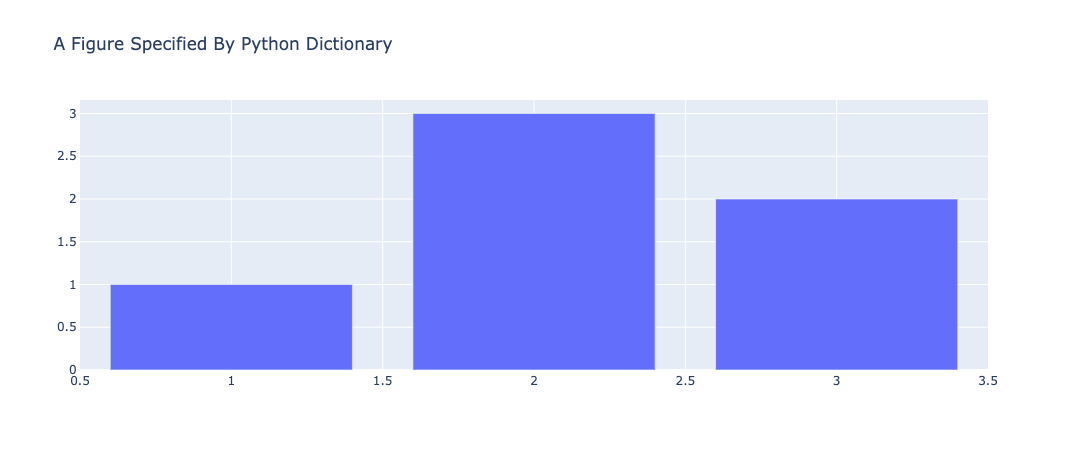

In [2]:
# To display the figure defined by this dict, use the low-level plotly.io.show function
import plotly.io as pio

# 下面的字典表示一个图形
fig = dict({
    "data": [{"type": "bar",
              "x": [1, 2, 3],
              "y": [1, 3, 2]}],
    "layout": {"title": {"text": "A Figure Specified By Python Dictionary"}}
})

pio.show(fig)

上述的data字典中，主要有`data`和`layout`两个key。

## Figures as Graph Objects

除了像上面那样说的那样手动构造Figure对象，还可以通过调用plotly函数来生成`plotly.graph_objects`对象，用这个来显示figure.

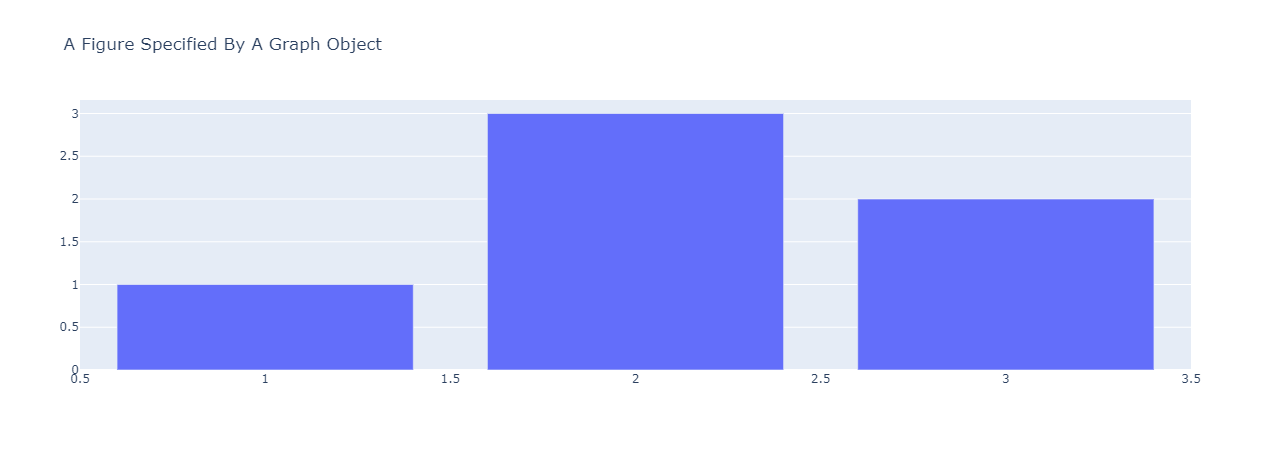

In [10]:
import plotly.graph_objects as go

# 这里使用graph_objects里的Figure函数来生成Graph 对象，而不是像上面那样用原始的字典表示图形
trace = go.Bar(x=[1, 2, 3], y=[1, 3, 2])
fig = go.Figure(
    ## 这里调用 Bar函数来生成图形类别，而不是手动指定
    data=trace,
    layout=go.Layout( 
        title=go.layout.Title(text="A Figure Specified By A Graph Object")
    )
)

# 可以直接在graph 对象上调用show方法
fig.show()

In [11]:
trace.__class__

plotly.graph_objs._bar.Bar

In [12]:
trace

Bar({
    'x': [1, 2, 3], 'y': [1, 3, 2]
})

In [13]:
fig.data.__class__

tuple

In [14]:
fig.data.__len__()

1

In [15]:
fig.data

(Bar({
     'x': [1, 2, 3], 'y': [1, 3, 2]
 }),)

In [22]:
trace=go.Scatter(x=[1,2,3], y=[1,4,9], mode='lines+markers', name='trace_1')
print(trace.__class__)
trace

<class 'plotly.graph_objs._scatter.Scatter'>


Scatter({
    'mode': 'lines+markers', 'name': 'trace_1', 'x': [1, 2, 3], 'y': [1, 4, 9]
})

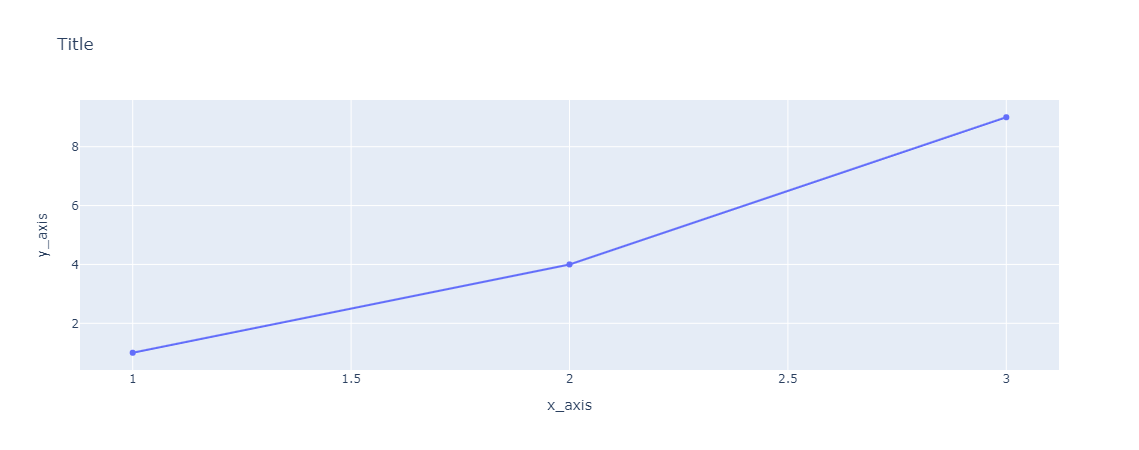

In [23]:
layout = go.Layout(
    title='Title',
    xaxis=go.layout.XAxis(title='x_axis'),
    yaxis=go.layout.YAxis(title='y_axis')
)
fig = go.Figure(data=trace,layout=layout)
fig.show()

推荐的方式是使用plotly的函数来构造figure对象

## 将Figure对象转成dict或者JSON

In [3]:
fig.to_dict()

{'data': [{'x': [1, 2, 3], 'y': [1, 3, 2], 'type': 'bar'}],
 'layout': {'title': {'text': 'A Figure Specified By A Graph Object'},
  'template': {'data': {'barpolar': [{'marker': {'line': {'color': '#E5ECF6',
        'width': 0.5}},
      'type': 'barpolar'}],
    'bar': [{'error_x': {'color': '#2a3f5f'},
      'error_y': {'color': '#2a3f5f'},
      'marker': {'line': {'color': '#E5ECF6', 'width': 0.5}},
      'type': 'bar'}],
    'carpet': [{'aaxis': {'endlinecolor': '#2a3f5f',
       'gridcolor': 'white',
       'linecolor': 'white',
       'minorgridcolor': 'white',
       'startlinecolor': '#2a3f5f'},
      'baxis': {'endlinecolor': '#2a3f5f',
       'gridcolor': 'white',
       'linecolor': 'white',
       'minorgridcolor': 'white',
       'startlinecolor': '#2a3f5f'},
      'type': 'carpet'}],
    'choropleth': [{'colorbar': {'outlinewidth': 0, 'ticks': ''},
      'type': 'choropleth'}],
    'contourcarpet': [{'colorbar': {'outlinewidth': 0, 'ticks': ''},
      'type': 'contourca

In [4]:
fig.to_json()

'{"data":[{"type":"bar","x":[1,2,3],"y":[1,3,2]}],"layout":{"template":{"data":{"bar":[{"error_x":{"color":"#2a3f5f"},"error_y":{"color":"#2a3f5f"},"marker":{"line":{"color":"#E5ECF6","width":0.5}},"type":"bar"}],"barpolar":[{"marker":{"line":{"color":"#E5ECF6","width":0.5}},"type":"barpolar"}],"carpet":[{"aaxis":{"endlinecolor":"#2a3f5f","gridcolor":"white","linecolor":"white","minorgridcolor":"white","startlinecolor":"#2a3f5f"},"baxis":{"endlinecolor":"#2a3f5f","gridcolor":"white","linecolor":"white","minorgridcolor":"white","startlinecolor":"#2a3f5f"},"type":"carpet"}],"choropleth":[{"colorbar":{"outlinewidth":0,"ticks":""},"type":"choropleth"}],"contour":[{"colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f92

## 设置Figure的各个属性

有两种方式来设置figure的属性：
1. 通过`fig.layout.title.text=`来设置
2. 通过`fig.update_layout(title_text='')`来设置

In [12]:
fig.layout.title.text

'A Figure Specified By A Graph Object'

In [13]:
fig.layout.title.text = 'A Figure Specified By A Graph Object + Add something'
fig.layout.title.text 

'A Figure Specified By A Graph Object + Add something'

In [16]:
fig.update_layout(title_text='new title')
fig.layout.title.text

'new title'

------------------

# 创建图形

plotly里有两种方式来创建图形：
1. 通过构造函数`plotly.graph_objects.Figure()`来创建，也就是上面展示的那样——这种方式使用的是更底层的API；
2. 通过`plotly.express`来创建——这种方式是对上面的封装，更加容易使用。

## 通过构造函数`plotly.graph_objects.Figure()`创建

1. 首先导入`graph_objects`
2. 使用`graph_objects.Figure()`创建`Figure`对象，同时使用`graph_objects.XXX`来指定绘制的图形。  
  需要设置两个属性：
  + `data`属性
  + `layout`属性
3. 在返回的fig上使用`.show`方法显示图形

注意，**这种方式创建图形时，坐标轴，图例，标题等信息需要自己手动设定，不会自动生成**。

In [24]:
# 第1步
import plotly.graph_objects as go

# 第2步
fig = go.Figure(
    # 1.设置data属性，这里调用 Bar函数来生成图形类别，而不是手动指定
    data=[ go.Bar(x=[1, 2, 3], y=[1, 3, 2]) ], 
    # 2.设置layout属性
    layout=go.Layout(
        title=go.layout.Title(text="A Figure Specified By A Graph Object")
    )
)

print(fig.__class__)

# 第3步
# fig.show()
# 在jupyter中，直接fig也可以显示图形

<class 'plotly.graph_objs._figure.Figure'>


## 通过`plotly.express`创建

`plotly.express` 接受的数据格式可以参考官方文档 [Plotly Express Arguments in Python](https://plotly.com/python/px-arguments).

+ 通过`plotly.express`可以更加简单的创建图形，只需要传入绘图的数据就行，不需要手动设定`layout`，省去了第二步的繁琐步骤。  
+ `plotly.express`里可以直接传入DF，然后选择其中的列作为绘图数据。  
+ **`plotly.express` 绘制的图形会自动生成坐标轴、图例等信息**。
+ `px.XXX`等绘图函数返回的也是一个`Figure()`对象.

In [8]:
import plotly.express as px

In [12]:
fig = px.bar(x=[1, 2, 3], y=[1, 3, 2])
fig.__class__

plotly.graph_objs._figure.Figure

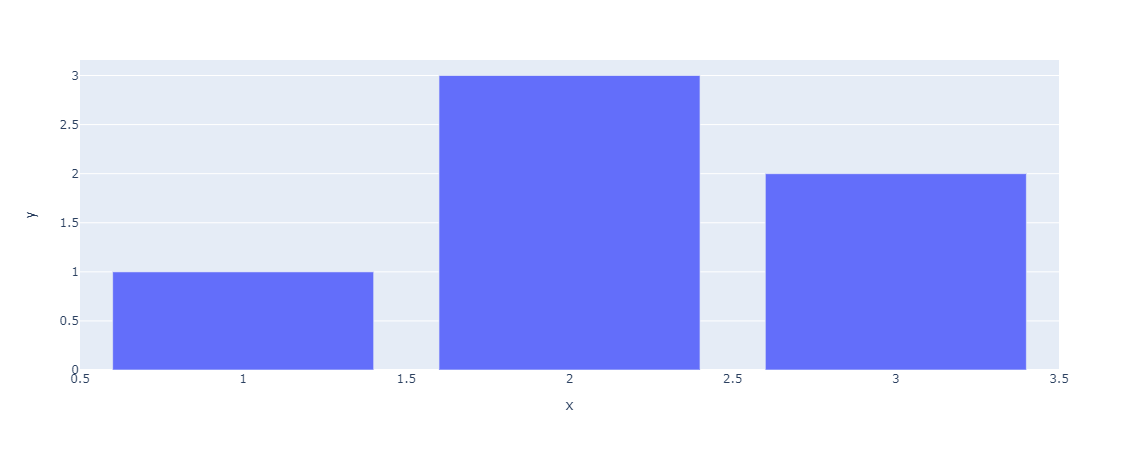

In [13]:
fig.show()

## 子图的构造

详细见官方文档 [Subplots and Plotly Express](https://plotly.com/python/subplots/).

有两种方式构造子图：
1. 使用`plotly.subplots.make_subplots`构建子图的对象`Figure`，然后使用下面两种方法之一来添加子图，同时设置子图位置：
  + `add_trace(trace=, row=, col=)`，添加一条trace
  + `add_traces(data=, rows=, cols= )`，添加多条trace
2. **使用plotly express的话，只能根据传入的DF里的变量来分割子图(faceting by a given data dimension)，不能构造任意形状的子图**。

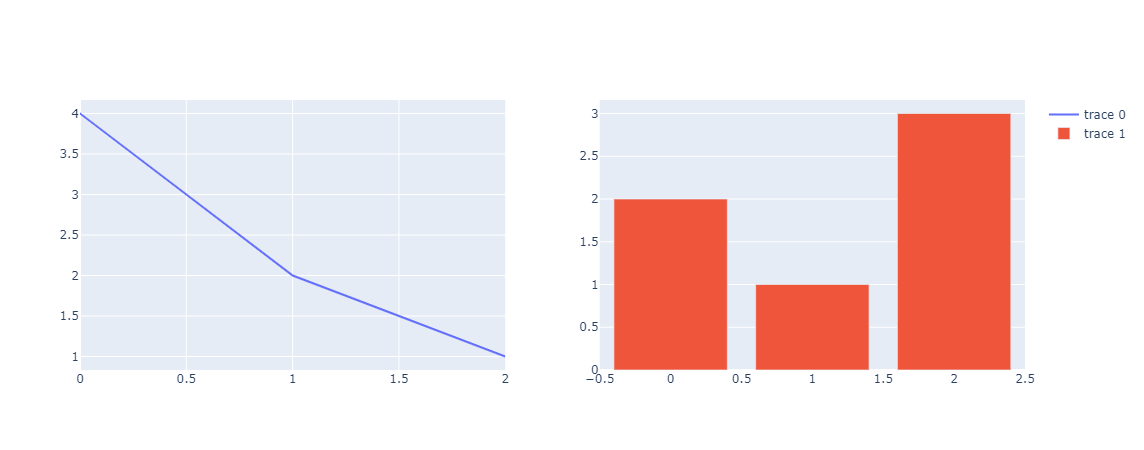

In [14]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Scatter(y=[4, 2, 1], mode="lines"), row=1, col=1)
fig.add_trace(go.Bar(y=[2, 1, 3]), row=1, col=2)

fig.show()

# 图形的更新-KEY

使用`plotly.express`绘图的一个缺点在于，`px`中提供的函数**无法直接对图形进行更加精细的控制，比如设置散点图的固定颜色，点的大小等等**。

如果需要修改这些属性，必须要通过返回的`Figure`对象的`.update_trace()`函数进行更新。

Plotly有关更新图形的相关文档见 [Creating and Updating Figures](https://plotly.com/python/creating-and-updating-figures/).

## 增加图形

`Figure`对象有两个方法可以添加Trace（**注意函数名的单复数和参数的单复数形式**）:
1. `add_trace(trace=, row=, col=)`方法，添加 **一条** trace
2. `add_traces(data=, rows=, cols=)`方法，添加 **多条** trace.

如果是子图，还可以同时设置添加的子图位置。

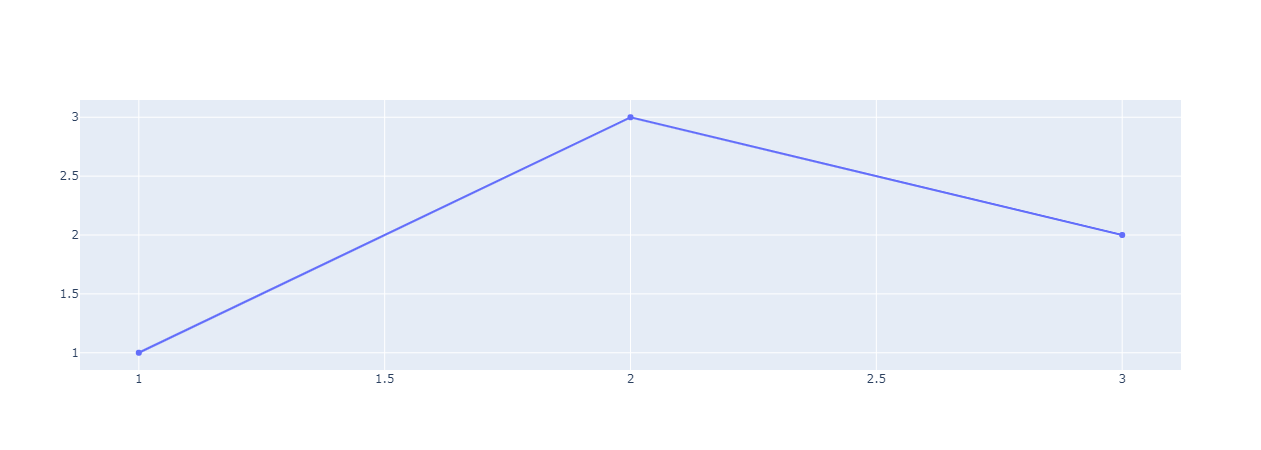

In [78]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=[1, 2, 3], y=[1, 3, 2]))

fig.show()

+ 如果要向子图中增加trace，可以指定位置

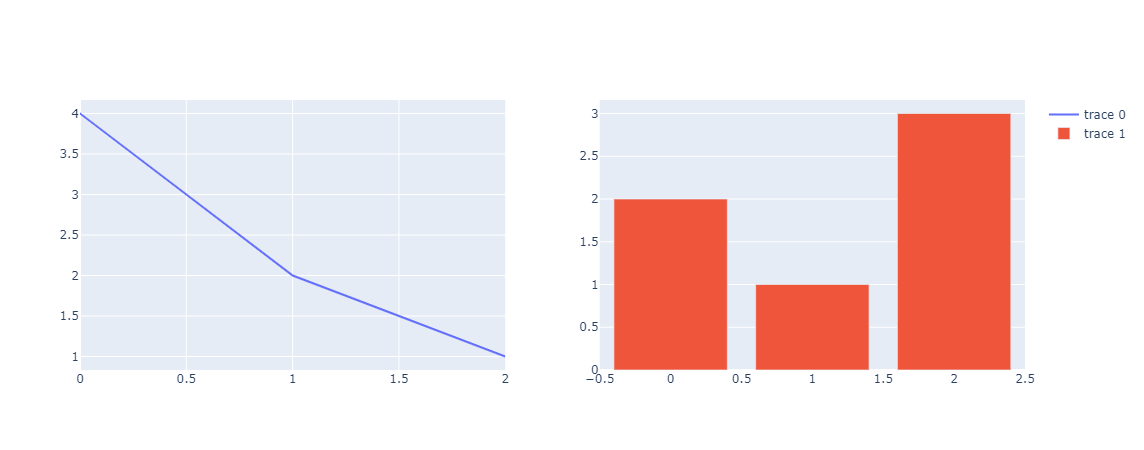

In [82]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2)

# row 和 col 参数指定子图
fig.add_trace(go.Scatter(y=[4, 2, 1], mode="lines"), row=1, col=1)
fig.add_trace(go.Bar(y=[2, 1, 3]), row=1, col=2)

fig.show()

## 更新 Figure Layouts-KEY

通过`Figure`对象的`update_layout()`方法实现。  
下面使用的这些属性可以在 [Python Figure Reference](https://plotly.com/python/reference/index/) 的 Layout 项目里找到。

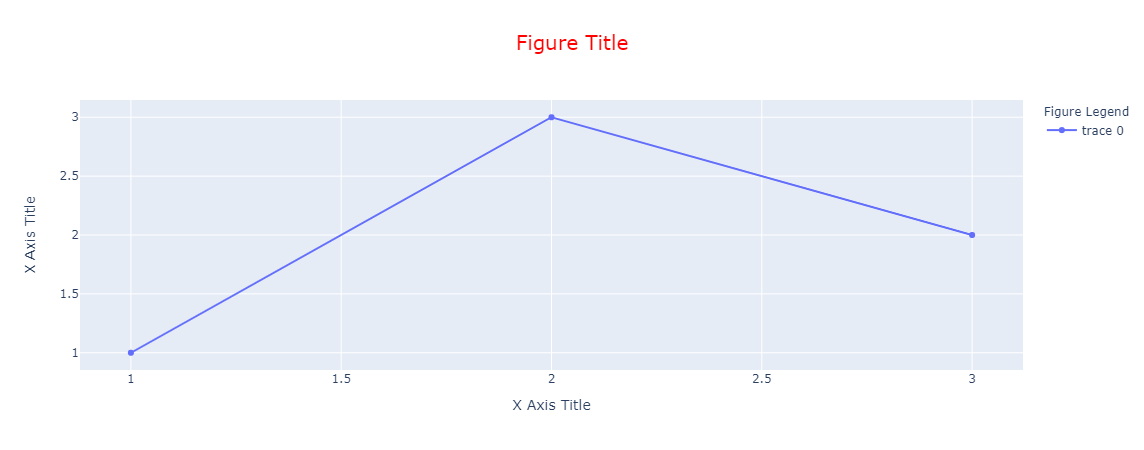

In [4]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[1, 3, 2]))

# 这里使用了属性+下划线的方式实现了快速访问设置
fig.update_layout(
    title_text="Figure Title",
    title_font_size=20,
    title_font_color='red',
    title_x=0.5,
    showlegend=True,
    legend_title_text='Figure Legend',
    legend_font_size=12,
    xaxis_title="X Axis Title",
    yaxis_title="X Axis Title",
    width=800,   #绘图宽度
    height=450   #绘图高度
)

# 另一种使用字典的更新方式
# fig.update_layout(
#     title={
#         'text':'Figure Title',
#         'font':{'size':20, 'color':'red'},
#         'x':0.5
#     },
#     showlegend=True,
#     legend={
#         'title':{'text':'Figure Legend'},
#         'font':{'size':12}
#     },
#     width=800,
#     height=450
# )

fig.show()

## 更新 Traces

通过`Figure`对象的`update_traces()`方法实现。   

下面使用的这些属性可以在 [Python Figure Reference](https://plotly.com/python/reference/index/) 的不同type的trace项目里找到，下面的这个例子使用的是Scatter这个type里的属性。

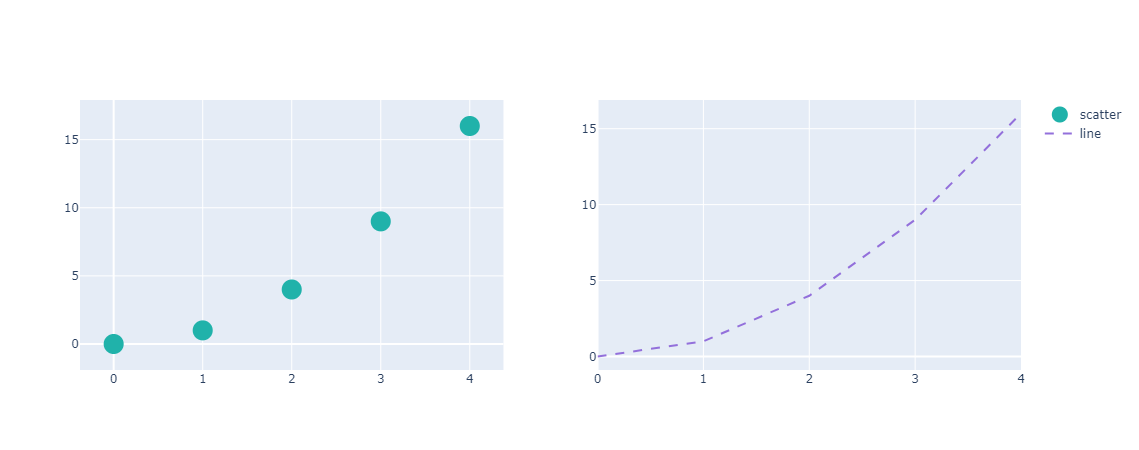

In [109]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2)
fig.add_scatter(x=[0,1,2,3,4], y=[0,1,4,9,16],
                
                # mode='markers'表示只绘制点，并且点的属性用 marker={}来设置
                mode="markers",
                marker={'size':20, 'color':"LightSeaGreen"},
                name="scatter",
                row=1, col=1)

fig.add_scatter(x=[0,1,2,3,4], y=[0,1,4,9,16],
                
                # mode='lines'表示只绘制线，并且线的属性用 line={} 来设置
                mode="lines",
                line={'width':2, 'color':"MediumPurple", 'dash':'dash'},
                name="line",
                row=1, col=2)

fig.show()

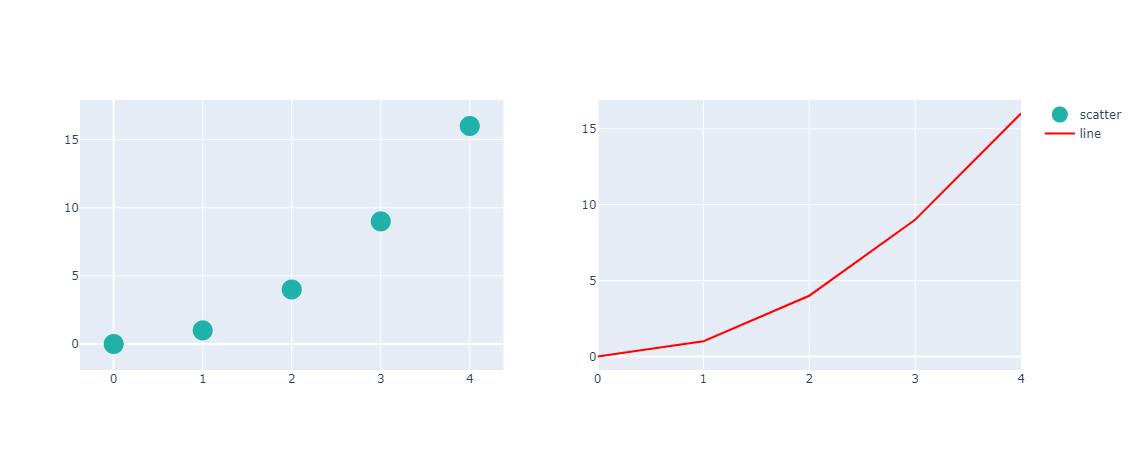

In [107]:
fig.update_traces(
    # 需要更新的属性
    marker={'color':'Red'},
    
    # 使用 selector来选择需要更新的部分，这里选择了 mode=lines,也就是上面的线图，
    selector={'mode':'lines'}
    
    # 如果是子图中是不同类型的trace,可以使用如下的方式来选择，下面是选择Bar图来更新
    #selector={'type':'bar'}
    # 也可以通过 row, col 参数指定要更新的trace
    #row=1, col=2
)
fig.show()

## 更新 Figure Axes

## 使用Figure对象属性的方式修改

----

# Plotly Python库的API结构

完整的API文档见 [Python API reference for `plotly`](https://plotly.com/python-api-reference/).

常用的三个子模块是：
+ [`plotly.express`](https://plotly.com/python-api-reference/plotly.express.html) : high-level interface for data visualization.  
这个里面大部分都是封装好的高级绘图**函数**，比如：
  + `px.scatter()`
  + `px.line()`
  + `px.bar()`


+ [`plotly.graph_objects`](https://plotly.com/python-api-reference/plotly.graph_objects.html#) : low-level interface to figures, traces and layout.  
这里面主要分为三大部分:
  1. Figure相关   
  只有一个[`plotly.graph_objects.Figure`类](https://plotly.com/python-api-reference/generated/plotly.graph_objects.Figure.html)
  2. Layout相关   
    + [`plotly.graph_objects.Layout`类](https://plotly.com/python-api-reference/generated/plotly.graph_objects.Layout.html)
    + `plotly.graph_objects.layout` 模块，里面提供了各种用于控制Layout本身的属性类。
  3. 各种类型绘图Trace. 要注意的是，每个类型的Trace 除了有对应的类（大写）外，还有对应的模块（小写）用于控制该类Trace中的各种属性。以下举几个例子：
    + `plotly.graph_objects.Scatter`类（大写），用于绘制点或者直线的类
    + `plotly.graph_objects.scatter`模块（小写），里面有用于控制点或者直线的各种属性的类
  
  
+ [`plotly.subplots`](https://plotly.com/python-api-reference/plotly.subplots.html#subplots) : helper function for laying out multi-plot figures.  
这个模块里就一个`make_subplots()`函数。


`plotly.graph_objects.Figure`类里主要有以下几个方法
+ `Figure([data, layout, frames, skip_invalid])`，类的构造方法
+ `Figure.show(*args, **kwargs)`，显示图形的方法
+ `Figure.add_traces(data[, rows, cols, …])`，添加trace
+ `Figure.update_traces([patch, selector, row, …])`，更新trace属性
+ `Figure.update_layout([dict1, overwrite])`，更新layout

总结下来，还是在下面的具体绘图中熟悉这些API比较好.

In [5]:
# 一个是具体的类，另一个是模块
print(go.Layout)
print(go.layout)

<class 'plotly.graph_objs._layout.Layout'>
<module 'plotly.graph_objs.layout' from 'D:\\MyProgramFiles\\Anaconda\\lib\\site-packages\\plotly\\graph_objs\\layout\\__init__.py'>


In [6]:
print(go.Scatter)
print(go.scatter)

<class 'plotly.graph_objs._scatter.Scatter'>
<module 'plotly.graph_objs.scatter' from 'D:\\MyProgramFiles\\Anaconda\\lib\\site-packages\\plotly\\graph_objs\\scatter\\__init__.py'>


----

# 具体绘图

## 散点图-KEY

（1）使用`plotly.express.scatter()`，这是一个**函数**，主要是面向 dataframe 的数据绘图，它里面的参数，大部分都是指定 DF 里的列.
+ `data_frame`，可以为空
+ 以下的这些参数，取值可以为 str, int, Series 或者 array-like.   
当为 str 时，指定的是 DF 里的列；Series时，就是作为数据；int时，
  + `x`, `y`: 横纵坐标值
  + `color`: 指定颜色的映射关系，**注意，不能使用 "red" 这种方式直接指定颜色**，它会被解释为 DF 里的某一列
  + `size`: 指定点的大小映射
  + `symbol`: 点的形状映射
  + `text`: 
+ `labels`: dict，用于指定坐标轴显示的名称，key 对应于 DF 里的列名称, value 是实际想显示的名称
+ `color_discrete_sequence`: list of str， **这个才是使用 "red", "blue" 等字符串指定颜色的参数**
+ `title`: **图的标题**
+ `width`, `height`: **指定图形的大小**.
+ `opacity`, 指定透明度.



（2）使用`graph_oject.Scatter()`，这是一个**类**，**不支持传入 DF**，只能手动传入数据，手动控制每个细节，但是也提供了更加精细的控制. 重要的几个实例化参数如下：
+ `x`, `y`：横纵坐标值
+ `name`: str，指定 trace 的名称，会显示为 legend 名称
+ `mode`: 指定绘制点图还是线图，取值为 line+markers, line, markers.
+ `line`: 用于控制线的属性，通常是一个dict,详细属性设置见官方文档 [Figure Reference->scatter trace->line](https://plotly.com/python/reference/scatter/#scatter-line). 常见属性如下（line的属性控制不多）：
  + `color`: 颜色
  + `width`: 线宽
  + `shape`: 线的类型
  + `dash`: 虚线
+ `marker`: 用于控制点的属性，dict，详细属性设置见官方文档 [Figure Reference->scatter trace->marker](https://plotly.com/python/reference/scatter/#scatter-marker). 常见的一些属性设置如下：
  + `size`: 以px为单位的点大小，可以是 int，也可以是 array
  + `color`: 颜色，可以是 str
  + `symbol`: 点的形状

In [1]:
import plotly.express as px

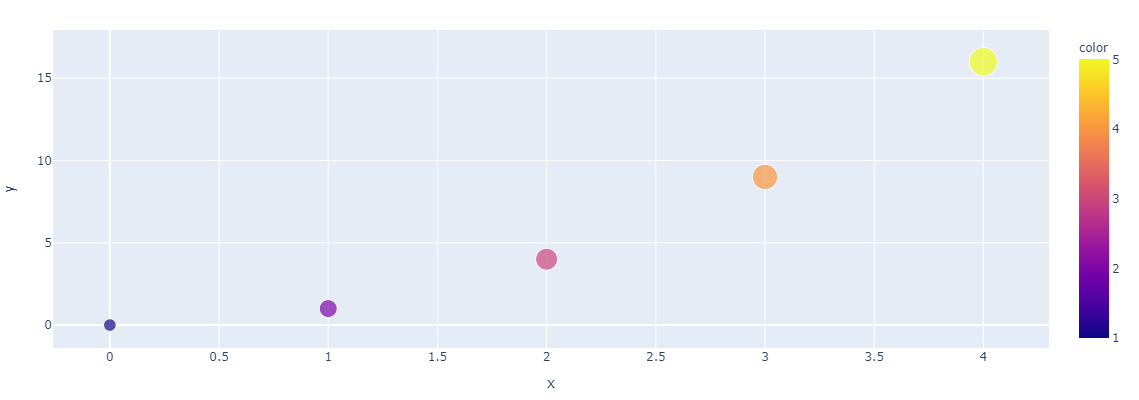

In [17]:
# 最简单的，x，y是list
# 但是这种情况下 color 和 size 必须提供对应的映射数据，不能是 str 或者 int
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16], 
                 color=[1,2,3,4,5], size=[1,2,3,4,5],
                 width=600, height=400,
                )
# 设置一下 页面白边
fig.update_layout(margin=dict(l=30, r=30, t=30, b=30))
fig.show()

In [10]:
df = px.data.iris()
df.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

注意，`plotly.express`支持直接导入DF，然后选择DF中的某一列进行绘图，但是`graph_object`不支持这种方式

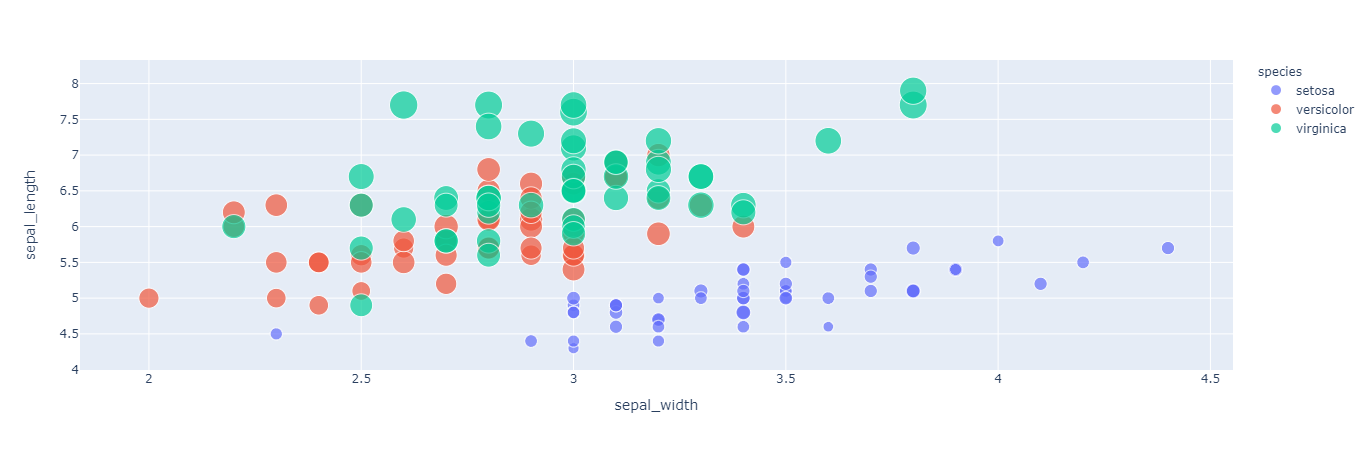

In [18]:
fig = px.scatter(data_frame=df, x='sepal_width', y='sepal_length', color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show()

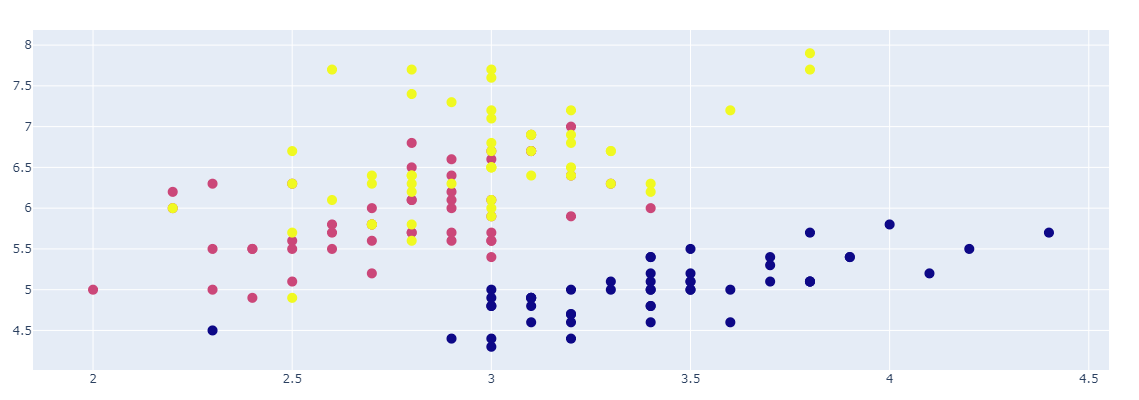

In [14]:
# 使用go.Scatter，点图需要指定参数 mode=markers，否则绘制的是线图
# fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers'))
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=df['sepal_width'], y=df['sepal_length'], 
               # mode 设置为 散点图
               mode='markers',
               # 用于控制点的形状，大小，颜色之类的属性，以字典的方式传入
               marker=dict(
                   size=10,
                   # color = list(df['species'])  # 离散的字符变量不能用作颜色，只能使用数值
                   color = list(df['species_id']),
               )
    )
)

fig.update_layout(autosize=False, width=600, height=400, 
                 # 设置一下 页面白边
                 margin=dict(l=30, r=30, t=30, b=30)
                 )

fig.show()

## 线图-KEY

+ `plotly.express`

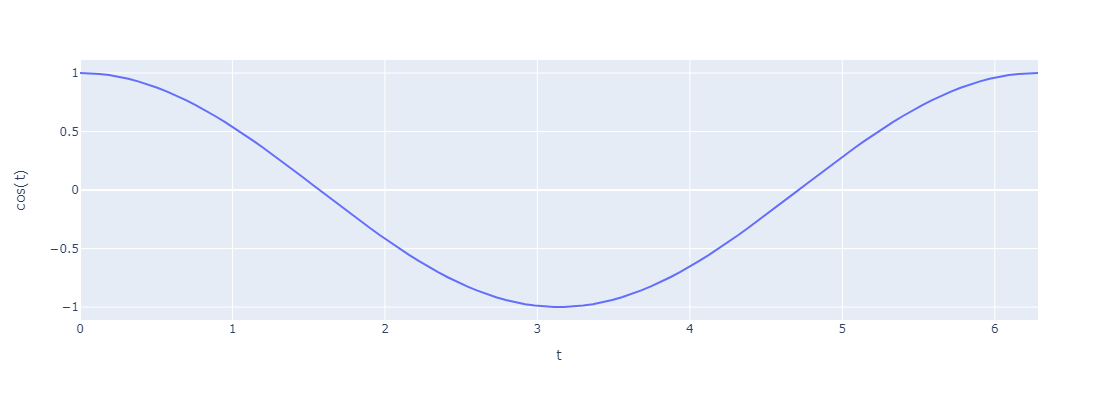

In [19]:
import numpy as np

t = np.linspace(0, 2*np.pi, 100)

fig = px.line(x=t, y=np.cos(t), labels={'x':'t', 'y':'cos(t)'}, width=600, height=400)
fig.show()

In [20]:
df = px.data.gapminder().query("continent == 'Oceania'")
df.head()

country continent  year  lifeExp       pop    gdpPercap iso_alpha  \
60  Australia   Oceania  1952    69.12   8691212  10039.59564       AUS   
61  Australia   Oceania  1957    70.33   9712569  10949.64959       AUS   
62  Australia   Oceania  1962    70.93  10794968  12217.22686       AUS   
63  Australia   Oceania  1967    71.10  11872264  14526.12465       AUS   
64  Australia   Oceania  1972    71.93  13177000  16788.62948       AUS   

    iso_num  
60       36  
61       36  
62       36  
63       36  
64       36

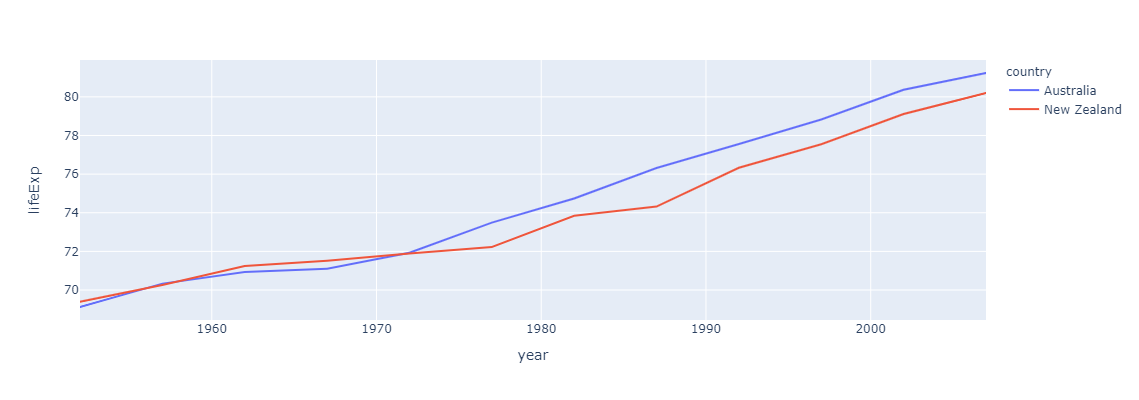

In [21]:
fig = px.line(df, x='year', y='lifeExp', color='country', width=600, height=400)
fig.show()

+ 使用`graph_object.Scatter`

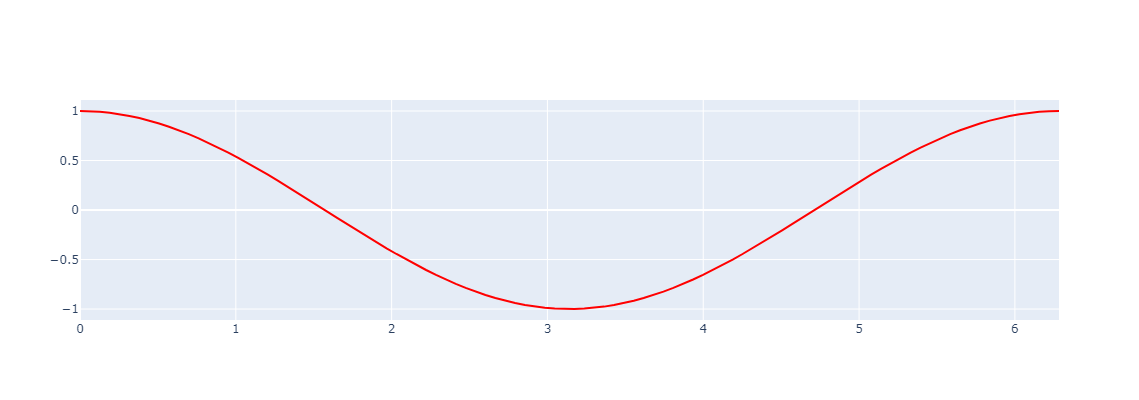

In [26]:
x = np.arange(10)

# 注意，也是使用的Scatter，但是不用指定 mode 参数，因为默认为线图
fig = go.Figure(
    data=go.Scatter(
        x=t, y=np.cos(t),
        mode="lines",
        line=dict(color="red")
    )
)
fig.update_layout(autosize=False,width=600,height=400)
fig.show()

## 条形图

## 直方图

In [6]:
df = pd.DataFrame([1,2,2,3,3,3],columns=['x'])
df

x
0  1
1  2
2  2
3  3
4  3
5  3

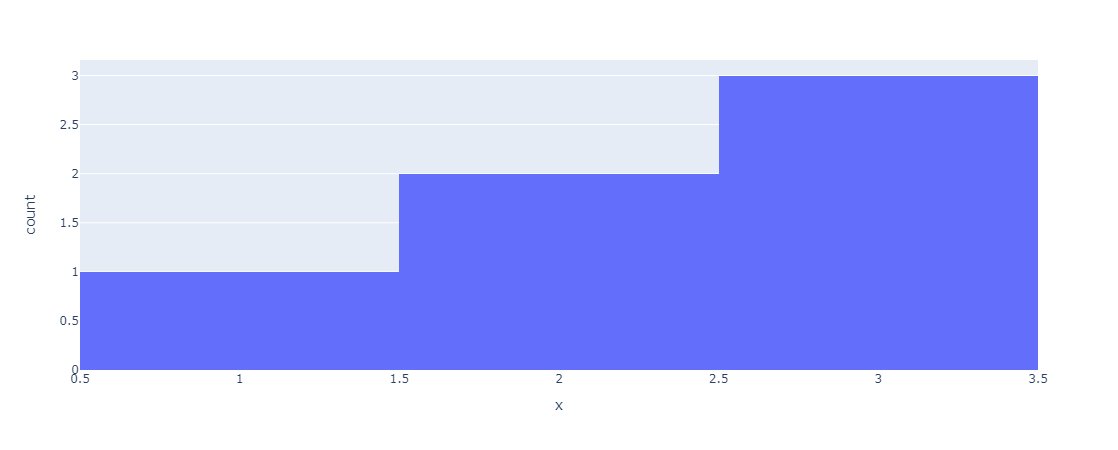

In [7]:
px.histogram(data_frame=df, x='x')

## 箱线图

[Plotly: How to group data and specify colors using go.box instead of px.box?
](https://stackoverflow.com/questions/60588385/plotly-how-to-group-data-and-specify-colors-using-go-box-instead-of-px-box)

## 小提琴图

## 热力图

## 旭日图

旭日图(SunBurst plot)

In [4]:
df = px.data.tips()
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [19]:
data = pd.DataFrame({
    'character': ["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    'parent': ["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    'value': [10, 14, 12, 10, 2, 6, 6, 4, 4]
})
data.head()

character parent  value
0       Eve            10
1      Cain    Eve     14
2      Seth    Eve     12
3      Enos   Seth     10
4      Noam   Seth      2

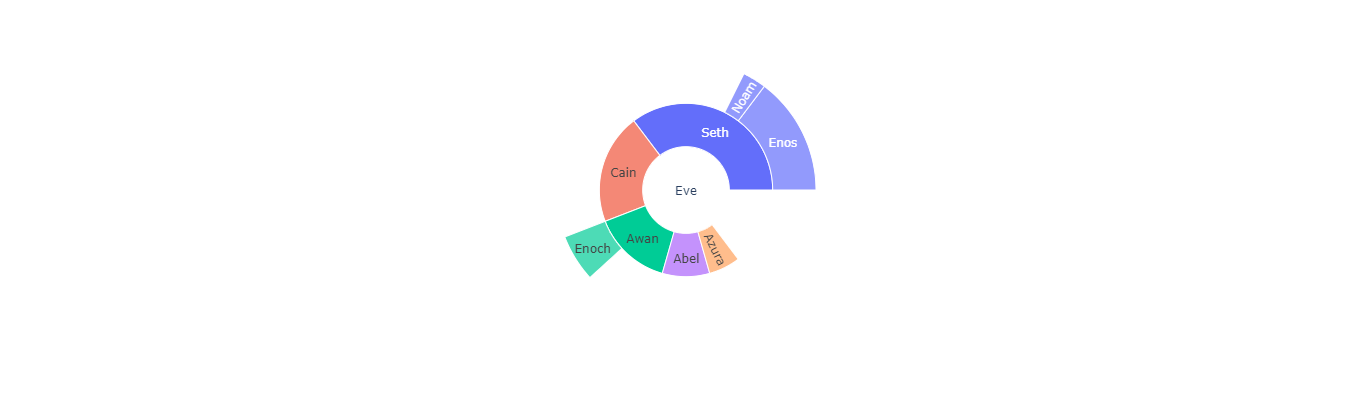

In [20]:
fig = px.sunburst(data, names='character', parents='parent', values='value', width=600, height=400)
fig.show()

In [21]:
print(fig)

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'character=%{label}<br>value=%{value}<br>parent=%{parent}<extra></extra>',
              'labels': array(['Eve', 'Cain', 'Seth', 'Enos', 'Noam', 'Abel', 'Awan', 'Enoch', 'Azura'],
                              dtype=object),
              'name': '',
              'parents': array(['', 'Eve', 'Eve', 'Seth', 'Seth', 'Eve', 'Eve', 'Awan', 'Eve'],
                               dtype=object),
              'type': 'sunburst',
              'values': array([10, 14, 12, 10,  2,  6,  6,  4,  4], dtype=int64)}],
    'layout': {'height': 400, 'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...', 'width': 600}
})


-----

# 色彩控制

连续色彩参考官方文档 [Continuous Color Scales and Color Bars in Python](https://plotly.com/python/colorscales/) 和 [Built-in Continuous Color Scales in Python](https://plotly.com/python/builtin-colorscales/).

离散色彩参考官方文档 [Discrete Colors in Python](https://plotly.com/python/discrete-color/#discrete-vs-continuous-color).